Distance normalized to 1AU (astronomical unit) and time to 1Y (year)

In [2]:
import matplotlib.pyplot as plt

In [3]:
# initial conditions

t = 0 
x = [35.2, 0]  # position vector
v = [0, 0.1920952]  # velocity vector
dt= 0.001
tmax = 100 # years, +- 2 orbits 

Nt= int(tmax/dt) 
Gamma = 39.39

In [4]:
def r(x):
    return (x[0]**2+x[1]**2)**(1/2)
def a(x, r):
    return -Gamma*x/r**3
def total_energy(x, y, vx, vy):
    return (vx**2+vy**2)/2+Gamma/r([x,y])

In [5]:
xs = [] # position history
vs = []  # velocity history


for i in range(Nt):
    v_half=[0,0]
    ri   = r(x.copy()) 
    a_old = [a(x[0],ri), a(x[1],ri)]
    x[0] = x[0]+ v[0]*dt + a_old[0]/2*dt**2
    x[1] = x[1]+ v[1]*dt + a_old[1]/2*dt**2
    xs.append(x.copy())
    ri   = r(x.copy())

    v_half[0] =  v[0] + 1/2*a_old[0]*dt
    v_half[1] = v[1] + 1 / 2 * a_old[1] * dt
    
    a_new = [a(x[0],ri), a(x[1],ri)]

    v[0] = v_half[0] + a_new[0]*dt/2
    v[1] = v_half[1] + a_new[1]*dt/2
    vs.append(v.copy())

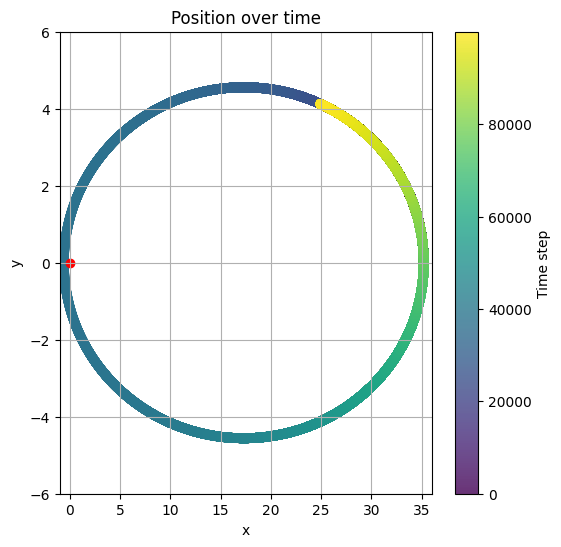

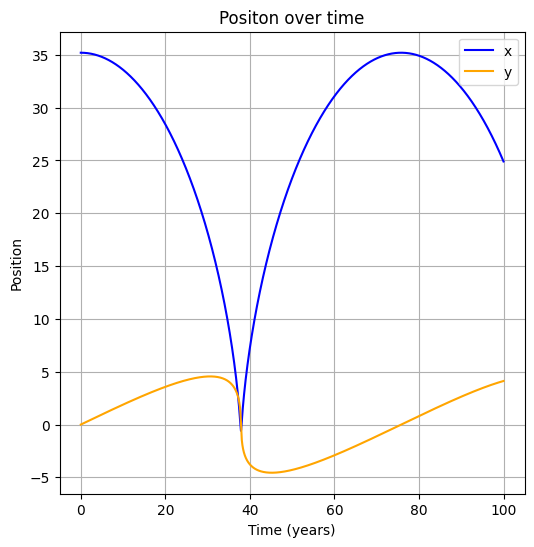

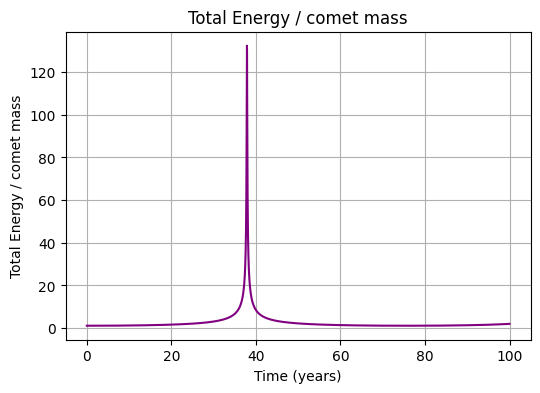

In [6]:
colors = range(Nt)  # values between 0 and 1 for colormap
xx, yy = zip(*xs)
vx, vy = zip(*vs)
Es = [total_energy(x, y, vx_i, vy_i) for (x, y), (vx_i, vy_i) in zip(xs, vs)]
# Plot
plt.figure(figsize=(6,6))
scatter = plt.scatter(xx, yy, c=colors, cmap='viridis', alpha=0.8)
plt.scatter(0,0, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Position over time')
plt.colorbar(scatter, label='Time step')
plt.ylim((-6,6))
plt.xlim((-1,36))
plt.grid(True)
plt.show()

# Velocity over time (plot each component)
plt.figure(figsize=(6,6))
plt.plot([i*dt for i in range(Nt)], xx, label='x', color='blue')
plt.plot([i*dt for i in range(Nt)], yy, label='y', color='orange')
plt.xlabel('Time (years)')
plt.ylabel('Position')
plt.title('Positon over time')
plt.grid(True)
plt.legend()
plt.show()


plt.figure(figsize=(6,4))
plt.plot([i*dt for i in range(Nt)], Es, color='purple')
plt.xlabel('Time (years)')
plt.ylabel('Total Energy / comet mass')
plt.title('Total Energy / comet mass')
plt.grid(True)
plt.show()

In [18]:
import numpy as np

np.argmax(xx[1:])*dt

np.float64(75.784)